# Week 1 - Getting started with H2O

In [13]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from C:\Anaconda_Python\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\HEETGO~1\AppData\Local\Temp\tmpteciq_u1
  JVM stdout: C:\Users\HEETGO~1\AppData\Local\Temp\tmpteciq_u1\h2o_Heet_Gorakhitya_started_from_python.out
  JVM stderr: C:\Users\HEETGO~1\AppData\Local\Temp\tmpteciq_u1\h2o_Heet_Gorakhitya_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,09 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,12 days
H2O cluster name:,H2O_from_python_Heet_Gorakhitya_s4j1ug
H2O cluster total nodes:,1
H2O cluster free memory:,885 Mb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [14]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv"
iris = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [15]:
train, test = iris.split_frame([0.8])

In [8]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
model = H2ODeepLearningEstimator()
model.train(["sepal_len", "sepal_wid", "petal_len", "petal_wid"], "class", train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [10]:
predictions = model.predict(test)
predictions

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,0.999814,0.000186047,8.92796e-25
Iris-setosa,0.999232,0.000767794,3.10771e-24
Iris-setosa,0.999854,0.000145593,1.36877e-24
Iris-setosa,0.999509,0.000490517,1.71483e-24
Iris-setosa,0.999977,2.28831e-05,1.83937e-25
Iris-setosa,0.999995,4.86348e-06,5.87087e-27
Iris-setosa,0.999888,0.000111759,6.16226e-24
Iris-setosa,0.999754,0.000245682,4.79382e-25
Iris-setosa,0.999365,0.000634769,2.96561e-23
Iris-setosa,0.998311,0.00168945,9.1782e-23


In [11]:
model.model_performance(test)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.011681654309763175
RMSE: 0.10808170201177984
LogLoss: 0.03746071400992464
Mean Per-Class Error: 0.041666666666666664
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
12.0,0.0,0.0,0.0,0 / 12
0.0,6.0,0.0,0.0,0 / 6
0.0,1.0,7.0,0.125,1 / 8
12.0,7.0,7.0,0.0384615,1 / 26


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9615384
2,1.0
3,1.0


In [12]:
#h2o.cluster().shutdown()

H2O session _sid_8761 closed.


In [16]:
from h2o.automl import H2OAutoML
auto_model = H2OAutoML(max_runtime_secs = 300)
auto_model.train(["sepal_len", "sepal_wid", "petal_len", "petal_wid"], "class", train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [17]:
auto_predictions = auto_model.leader.predict(test)
auto_predictions

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,0.999935,6.46358e-05,8.48534e-22
Iris-setosa,0.999971,2.90325e-05,4.27828e-23
Iris-setosa,0.999843,0.000157031,1.70686e-20
Iris-setosa,0.999994,5.90955e-06,1.2596e-23
Iris-setosa,0.99924,0.000760059,7.49715e-19
Iris-setosa,0.999656,0.000343679,9.73705e-21
Iris-setosa,0.999723,0.000277371,1.35975e-19
Iris-setosa,0.999961,3.9119e-05,5.7793e-22
Iris-versicolor,4.7555e-06,0.999137,0.000858658
Iris-versicolor,0.000280349,0.995027,0.00469294


In [21]:
auto_model.leader.model_performance(test)


ModelMetricsMultinomialGLM: glm
** Reported on test data. **

MSE: 0.012780627713001995
RMSE: 0.11305143834999179


In [23]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
rfmodel = H2ORandomForestEstimator()
rfmodel.train(["sepal_len", "sepal_wid", "petal_len", "petal_wid"], "class", train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [25]:
rfpreds = rfmodel.predict(test)
rfpreds

drf prediction progress: |████████████████████████████████████████████████| 100%


predict,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,0.997818,0,0.00218154
Iris-setosa,0.997818,0,0.00218154
Iris-setosa,0.997818,0,0.00218154
Iris-setosa,0.997818,0,0.00218154
Iris-setosa,0.997818,0,0.00218154
Iris-setosa,0.997818,0,0.00218154
Iris-setosa,0.997818,0,0.00218154
Iris-setosa,0.997818,0,0.00218154
Iris-versicolor,0,0.976942,0.0230582
Iris-versicolor,0,0.997818,0.00218154


In [26]:
rfmodel

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1549539787372_1


ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.03763616743827016
RMSE: 0.19400043154145344
LogLoss: 0.11217183437804473
Mean Per-Class Error: 0.04939024390243902
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
42.0,0.0,0.0,0.0,0 / 42
0.0,38.0,3.0,0.0731707,3 / 41
0.0,3.0,37.0,0.075,3 / 40
42.0,41.0,40.0,0.0487805,6 / 123


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9512195
2,1.0
3,1.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
,2019-02-07 18:39:31,0.117 sec,0.0,nan,nan,nan
,2019-02-07 18:39:32,1.111 sec,1.0,0.2581989,2.3025851,0.0666667
,2019-02-07 18:39:32,1.127 sec,2.0,0.2791453,2.6913332,0.0779221
,2019-02-07 18:39:32,1.127 sec,3.0,0.2514132,1.7946116,0.0816327
,2019-02-07 18:39:32,1.127 sec,4.0,0.2590119,1.9330128,0.0825688
---,---,---,---,---,---,---
,2019-02-07 18:39:32,1.548 sec,46.0,0.1943656,0.1147102,0.0487805
,2019-02-07 18:39:32,1.552 sec,47.0,0.1961596,0.1165224,0.0650407
,2019-02-07 18:39:32,1.556 sec,48.0,0.1930950,0.1106255,0.0569106
,2019-02-07 18:39:32,1.564 sec,49.0,0.1946163,0.1123759,0.0650407



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
petal_len,1607.8045654,1.0,0.4554470
petal_wid,1419.5438232,0.8829082,0.4021179
sepal_len,388.7242737,0.2417733,0.1101149
sepal_wid,114.0955658,0.0709636,0.0323201


In [27]:
rfmodel.model_performance(test)


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.021175709284524943
RMSE: 0.14551875921861396
LogLoss: 0.07153463521925674
Mean Per-Class Error: 0.037037037037037035
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



Iris-setosa,Iris-versicolor,Iris-virginica,Error,Rate
8.0,0.0,0.0,0.0,0 / 8
0.0,8.0,1.0,0.1111111,1 / 9
0.0,0.0,10.0,0.0,0 / 10
8.0,8.0,11.0,0.0370370,1 / 27


Top-3 Hit Ratios: 


k,hit_ratio
1,0.962963
2,1.0
3,1.0


# Week 2 - Starting with importing custom data

In [28]:
import h2o
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 hour 45 mins
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,12 days
H2O cluster name:,H2O_from_python_Heet_Gorakhitya_s4j1ug
H2O cluster total nodes:,1
H2O cluster free memory:,654 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [30]:
x = [z*0.01 for z in range(0, 1001)]
y = np.sin(x)
y = y + np.random.normal(0, 0.1, len(x))

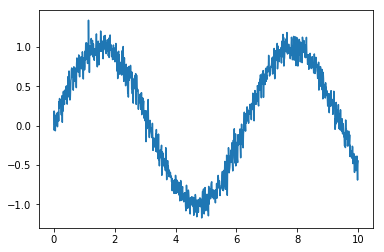

In [31]:
plt.plot(x, y)
plt.show()

In [34]:
sine_wave = pd.DataFrame({'a':x, 'b':y})
sine_wave_h2o = h2o.H2OFrame(sine_wave)
sine_wave_h2o

Parse progress: |█████████████████████████████████████████████████████████| 100%


a,b
0,-0.0523579
0.01,0.184029
0.02,0.168842
0.03,0.0071562
0.04,0.0725344
0.05,-0.066683
0.06,0.0621148
0.07,0.132121
0.08,0.00749022
0.09,0.0937313


In [35]:
sine_wave_h2o.as_data_frame()

,a,b
0,0.00,-0.052358
1,0.01,0.184029
2,0.02,0.168842
3,0.03,0.007156
4,0.04,0.072534
5,0.05,-0.066683
6,0.06,0.062115
7,0.07,0.132121
8,0.08,0.007490
9,0.09,0.093731


# Week 2 - Self-made dataset evaluation

In [ ]:
+